<h2 style="text-align: center;"><b>Практическое задание: Архитектуры и Transfer Learning</b></h3>

Работу выполнил: Зыков Кирилл Алексеевич, студент группы МО-201

В данном ноутбуке мы поближе познакомимся с архитектурами *AlexNet*, *VGG* и *Inception (GoogleNet)*, и для каждой из этих моделей используем технику **Transfer Learning**.  

\> **В конце ноутбука Вам предстоит выполнить задание. Суммарно за него можно получить 10 баллов.** <

**Transfer Learning** - это процесс дообучения уже обученной нейросети на **новых данных**. Например, часто берут обученную на датасете [ImageNet](http://www.image-net.org/) нейронную сеть и дообучают ее на своих данных.

<img src="https://miro.medium.com/max/5252/1*Z11P-CjNYWBofEbmGQrptA.png" width=650>

<h2 style="text-align: center;"><b>Архитектуры</b></h3>

Во второй половине ноутбука мы будем дообучать AlexNet, VGG и GoogleNet (Inception) на новых данных. Но сначала вспомним, что эти нейросети из себя представляют (**повторение видеоурока**):

<h2 style="text-align: center;"><b>AlexNet</b></h2>

**AlexNet** - нейронная сеть, которая победила в ILSVRC (соревнование по классификации картинок из ImageNet) в 2012 году и стала основой для многих других архитектур. Впервые она была представлена в статье  “ImageNet Classification with Deep Convolutional Neural Networks”, над которой работал Джоффри Хинтон - человек, которого многие называют отцом современного computer vision.

Архитектура:

<img src="https://www.learnopencv.com/wp-content/uploads/2018/05/AlexNet-1.png" width=700>

**AlexNet** состоит из 5 **сверточных** слоев, 3 **MaxPool** слоев и 2 **FullyConnected** слоев в конце. Обратите внимание, что в последнем пулинг слое окна, из которых берется максимум, пересекаются за счет того, что *stride*=2. Это изменение по сравнению с традиционным пулингом помогло снизить ошибку на 0.4%.

По сути **AlexNet** это **самая базовая** архитектура для сверточной сети.

<h2 style="text-align: center;"><b>VGG</b></h3>

Эта сеть возникла из следующей идеи: один **сверточный** слой с фильтром 5$\times$5 можно заменить двумя подряд идущими слоями с фильтрами размером 3$\times$3, так как **воспринимаемая область (receiptive field)** картинки у них будет одинаковой. При этом уменьшиться количество параметров, поэтому такую сеть будет легче обучать. 

<img src="https://cdn-images-1.medium.com/max/1600/1*YpXrr8bN5XyqOlztKPHvDw@2x.png" width=400>

На момент создания VGG люди уже заметили, что чем больше слоев в нейросети, тем выше ее точность. Заменяя большие фильтры на несколько фильтров 3$\times$3 исследователи получили глубокую нейросеть с меньшим количеством параметров. Архитектура VGG-16 (версия VGG с 16 слоями) представлена на картинке ниже:


<img src="https://cdn-images-1.medium.com/max/1040/1*0Tk4JclhGOCR_uLe6RKvUQ.png" width=650>


<h2 style="text-align: center;"><b>GoogleNet (Inception v1)</b></h3>

#### Рассмотрим идею, которая подтолкнула исследователей к созданию этой архитектуры.

Площадь, которую занимает классифицируемый объект, может очень сильно отличаться. Пример на картинках ниже: 

<img src="https://cdn-images-1.medium.com/max/1040/1*aBdPBGAeta-_AM4aEyqeTQ.jpeg" width=700>

Для извлечения информации с большой площади лучше всего подходят **большие** фильтры, и, наоборот, для маленьких объектов лучше **маленькие** фильтры. 

Глубокие нейронные сети намного сложнее обучать: в них появляется проблема **затухания градиента** и они **переобучаются**.
Чтобы решить первую проблему исследователи придумали **Incepton** модуль, который применяет фильтры разного размера и затем склеивает полученные каналы. При этом извлекается как информация из больших объектов, так и из маленьких. 


<img src="https://cdn-images-1.medium.com/max/1040/1*DKjGRDd_lJeUfVlY50ojOA.png" width=600>

Сеть состоит из **корня** (нескольких сверточных слоев) и **Inception** модулей идущих за ним. Оранжевым прямоугольников выделен корень, а фиолетовыми - **вспомогательные классификаторы**. Именно они помогают бороться со второй проблемой -- затуханием градиентов. Наша функция потерь - взвешенная сумма **LogLoss** на двух **вспомогательных классификаторах** и **основном** в конце нейронной сети.


<img src="https://cdn-images-1.medium.com/max/1040/1*uW81y16b-ptBDV8SIT1beQ.png">

Представим теперь, что eсть свой набор данных, и Вы хотите научить сеть классифицировать объекты из Вашей выборки. Есть два пути:
1. Обучить сеть с нуля (как мы, например, делали в предыдущем Задании по MNIST);
2. Взять предобученную нейросеть и дообучить ее на своих данных (Transfer Learning)

<h2 style="text-align: center;"><b>Transfer Learning</b></h3>

Ключевая роль этой техники -- эффективное обучение нейросетей в случае, когда мало данных. Если взять нейросеть и обучить ее **с нуля на новых данных**, притом, что их мало (менее 1000 картинок), то она почти наверное **переобучится** и будет плохо работать на тестовых данных.

Если же брать предобученную нейросеть и **дообучить ее на новых данных** -- можно избежать переобучения. Это и есть суть **Transfer Learning**.

Вспомним общую архитектуру CNN:

<img src="https://camo.githubusercontent.com/269e3903f62eb2c4d13ac4c9ab979510010f8968/68747470733a2f2f7261772e6769746875622e636f6d2f746176677265656e2f6c616e647573655f636c617373696669636174696f6e2f6d61737465722f66696c652f636e6e2e706e673f7261773d74727565" width=800>

Все выше описанные архитектуры подходят под эту схему (Inception чуть сложнее, но в конце все равно стоит классификатор в виде FC-слоев).  

Напомним, что **параметрами нейросети являюстя веса нейронов в слоях**. В полносвязных слоях это обычные нейроны (из предыдущего блока курса), в сверточных слоях это сверточные нейроны (которые осуществляют операцию свертки).

Именно эти веса и меняются при обучении нейросети. Под **заморозкой** слоя подразумевается отключение обновления весов этого слоя при обучении нейросети. То есть во время алгоритма backpropagation веса замороженных слоев не обновляются, а лишь участвуют в вычислениях как константы.



Transfer Learning можно делать двумя способами:

1. **Feature Extractor** способ:
    * Берём **уже обученную** нейросеть
    * **Убираем последние полносвязные слои** сети, отвечающие за классификацию
    * Ставим вместо них **свои слои классификации** (например, 2 полносвязных слоя), веса этих слоев **будут меняться во время обучения**
    * Веса всех свёрточных слоёв **заморожены**, то есть во время обучения сети они **меняться не будут**
    * **Обучаем** всю сеть (меняются только слои классификации) на новом датасете 
    * Используем полученную модель для предсказания
2. **Fine Tuning** способ:  
    * Берём **уже обученную** нейросеть
    * **Убираем последние полносвязные слои** сети, отвечающие за классификацию
    * Ставим вместо них **свои слои классификации** (например, 2 полносвязных слоя), веса этих слоев **будут меняться во время обучения**
    * Веса всех свёрточных слоёв **разморожены**, то есть во время обучения сети они **будут меняться**
    * **Обучаем** всю сеть (меняются веса всех слоев) на новом датасете 
    * Используем полученную модель для предсказания

Также при Fine Tuning можно размораживать не все сверточные слои, а лишь некоторые из них. Частая практика размораживать какое-то небольшое количество слоев "с конца" нейросети, которые ближе к слоям классификации, а первые 10-20 слоев оставлять замороженными.

<h2 style="text-align: center;"><b>Переходим к практике</b></h3>

<p style="text-align: center;"><i>(основано на http://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)</i></p>

Практическую часть ноутбука крайне рекомендуется выпонять в сервисе [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true). В нем **обязательно** нужно поставить `Runtime -> Change Runtime Type -> GPU`:

<img src="https://i.ibb.co/HhWKBKj/2020-03-11-0-14-59.png">

<img src="https://i.ibb.co/y5CftFB/2020-03-11-0-15-46.png">

In [ ]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os

import warnings
warnings.filterwarnings("ignore")

plt.ion()

Попробуем 3 типа архитектур свёрточных нейросетей -- **AlexNet, VGG16, Inception_v3** -- как *Feature Extractor* и с помощью *Fine Tuning*.

**Для каждого пункта нужно:**
- вывести график loss'а на обучающей и на валидационной выборке
- вывести качество модели (поклассовый accuracy)

### Данные  

В задании используются сети из библиотеки **torchvision**, предобученные на датасете ImageNet.  
В качестве новых данных будет датасет **Муравьи vs Пчёлы**: всего 400 картинок, ~250 обучение и ~150 валидация (тест).

### Функции для отрисовки и обучения модели:

* Загрузим данные:

In [ ]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2023-06-06 11:58:27--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.249.85.10, 13.249.85.72, 13.249.85.7, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.249.85.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  76.0MB/s    in 0.6s    

2023-06-06 11:58:28 (76.0 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [ ]:
!unzip ./hymenoptera_data.zip

Archive:  ./hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/ants/1473

In [ ]:
# Преобразование обучающих данных для подачи в нейросеть
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(244),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
# Gапка с данными
data_dir = './hymenoptera_data'
image_datasets = {
    x: datasets.ImageFolder(
        os.path.join(data_dir, x),
        data_transforms[x])
    for x in ['train', 'val']
}
# Cпециальный класс для загрузки данных в виде батчей
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], 
        batch_size=4,
        shuffle=True, 
        num_workers=4
    )
    for x in ['train', 'val']
}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()

Размеры обучающей и валидационной выборок:

In [ ]:
print(dataset_sizes)

{'train': 244, 'val': 153}


В каждом батче будет по 4 картинки, и мы поставили `shuffle = True`, чтобы генератор выдавал случайные батчи из обучающей выборки.

Посмотрим на картинки из датасета:

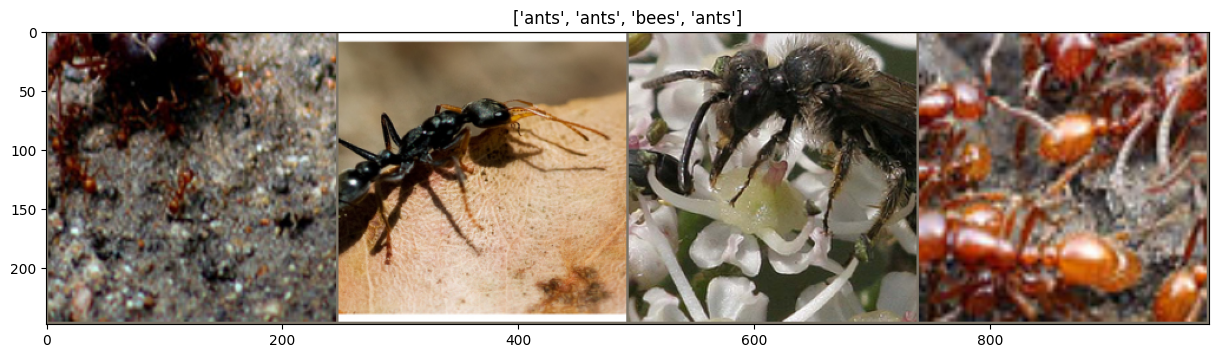

In [ ]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15, 12))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


# Получим 1 батч (картнки-метки) из обучающей выборки
inputs, classes = next(iter(dataloaders['train']))

# Расположим картинки рядом
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
for i in dataloaders['train']:
    print(i[0][0])
    break

tensor([[[ 0.9646,  0.9132,  0.9646,  ..., -0.7479, -0.7650, -0.7650],
         [ 1.3927,  1.2728,  1.2557,  ..., -0.6965, -0.7137, -0.7308],
         [ 1.6838,  1.6153,  1.5468,  ..., -0.6794, -0.6794, -0.6965],
         ...,
         [-1.3302, -1.2959, -1.2445,  ...,  0.8961,  0.7591,  0.6221],
         [-1.3815, -1.3130, -1.2788,  ...,  0.8618,  0.7077,  0.6392],
         [-1.3473, -1.3473, -1.2959,  ...,  0.6734,  0.5193,  0.6906]],

        [[ 1.3782,  1.3606,  1.3957,  ..., -0.4076, -0.4426, -0.4601],
         [ 1.7283,  1.6408,  1.5707,  ..., -0.3550, -0.3550, -0.4251],
         [ 1.9384,  1.8859,  1.8158,  ..., -0.3375, -0.3375, -0.3901],
         ...,
         [-1.1078, -1.0903, -1.0553,  ...,  1.3256,  1.1856,  1.0105],
         [-1.1604, -1.1078, -1.0728,  ...,  1.3081,  1.1506,  1.0455],
         [-1.1253, -1.1253, -1.0903,  ...,  1.2031,  1.0455,  1.1506]],

        [[ 0.1651, -0.1661, -0.3927,  ..., -0.7587, -0.7761, -0.7936],
         [ 0.9842,  0.5485,  0.1128,  ..., -0

Видим, что после обработки данные в батчах нормализованы (то есть они не от 0 до 255, как это изначально в изображениях).

### Обучение моделей

Следующая функция будет использоваться для обучения модели. Аргументы:  
* model $-$ нейросеть
* loss $-$ оптимизируемая функция (criterion, cost function, objective)
* optimizer $-$ оптимизационный алгоритм
* scheduler $-$ алгоритм изменения learning_rate
* num_epochs $-$ количество итераций обучения

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0
    
    losses = {'train': [], 'val': []}

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # каждя эпоха имеет обучающую и тестовую стадии
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # установаить модель в режим обучения
            else:
                model.train(False)  # установить модель в режим предсказания

            running_loss = 0.0
            running_corrects = 0

            # итерируемся по батчам
            for data in dataloaders[phase]:
                # получаем картинки и метки
                inputs, labels = data

                # оборачиваем в переменные
                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()
                else:
                    inputs, labels = inputs, labels

                # инициализируем градиенты параметров
                optimizer.zero_grad()

                # forward pass
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # backward pass + оптимизируем только если это стадия обучения
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # статистика
                running_loss += loss.item()
                running_corrects += int(torch.sum(preds == labels.data))

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            
            losses[phase].append(epoch_loss)
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # если достиглось лучшее качество, то запомним веса модели
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # загрузим лучшие веса модели
    model.load_state_dict(best_model_wts)
    return model, losses

Функция для отрисовки тестовых изображений и предсказаний для них:

In [ ]:
def visualize_model(model, num_images=6):
    images_so_far = 0
    fig = plt.figure()

    for i, data in enumerate(dataloaders['val']):
        inputs, labels = data
        if use_gpu:
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)

        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)

        for j in range(inputs.size()[0]):
            images_so_far += 1
            ax = plt.subplot(num_images // 2, 2, images_so_far)
            ax.axis('off')
            ax.set_title('predicted: {}'.format(class_names[preds[j]]))
            imshow(inputs.cpu().data[j])

            if images_so_far == num_images:
                return

Функция для измерения точности модели на валидационном датасете

In [ ]:
def evaluate(model):
    model.train(False)
    
    runninig_correct = 0
    for data in dataloaders['val']:
        # получаем картинки и метки
        inputs, labels = data
        
        # переносим на GPU, если возможно
        if use_gpu:
            inputs = inputs.cuda()
            labels = labels.cuda()
            
        # forward pass
        output = model(inputs)
        _, predicted = torch.max(output, 1)
        
        runninig_correct += int(torch.sum(predicted == labels))
        
    return runninig_correct / dataset_sizes['val']

Для каждой из следующих нейросетей:
* **AlexNet**
* **VGG16**
* **GoogleNet (Inception)**

Напишем код и выведем результат (график лосса, accuracy и вывод примера классификации картинок с визуализацией) для двух способов: **Feature Extractor** и **Fine Tuning** нейросети.

### AlexNet

Загрузка модели:

In [ ]:
model = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 82.3MB/s]


Посмотрим, что внутри:

In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Видим, что на вход классификатору (classifier) подаётся *9216 признаков*. Это и будет размер входа для нашего нового классификатора.

* **Fine Tuning** способ

Убедимся, что по-умолчанию все слои "разморожены", то есть будут обучаться:

In [ ]:
for i, param in enumerate(model.parameters()):
    print(f'Parameter {i}: {param.requires_grad}')

Parameter 0: True
Parameter 1: True
Parameter 2: True
Parameter 3: True
Parameter 4: True
Parameter 5: True
Parameter 6: True
Parameter 7: True
Parameter 8: True
Parameter 9: True
Parameter 10: True
Parameter 11: True
Parameter 12: True
Parameter 13: True
Parameter 14: True
Parameter 15: True


(*по умолчанию backpropagation распространяется на все слои, поэтому здесь мы только заменяем FC-слой на свой классификатор*)

In [ ]:
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216
# Заменяем Fully-Connected слой на наш линейный классификатор
model.classifier = nn.Linear(num_features, 2)

# Использовать ли GPU
if use_gpu:
    model = model.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model, losses = train_model(model, loss_fn, optimizer_ft, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.2499 Acc: 0.5697
val Loss: 0.1759 Acc: 0.4967

Epoch 1/24
----------
train Loss: 0.1731 Acc: 0.5246
val Loss: 0.1767 Acc: 0.5490

Epoch 2/24
----------
train Loss: 0.1719 Acc: 0.5492
val Loss: 0.1767 Acc: 0.5948

Epoch 3/24
----------
train Loss: 0.1699 Acc: 0.5369
val Loss: 0.1785 Acc: 0.5882

Epoch 4/24
----------
train Loss: 0.1684 Acc: 0.6148
val Loss: 0.1747 Acc: 0.5882

Epoch 5/24
----------
train Loss: 0.1713 Acc: 0.5943
val Loss: 0.1722 Acc: 0.6209

Epoch 6/24
----------
train Loss: 0.1660 Acc: 0.6230
val Loss: 0.1709 Acc: 0.6405

Epoch 7/24
----------
train Loss: 0.1645 Acc: 0.6270
val Loss: 0.1681 Acc: 0.6405

Epoch 8/24
----------
train Loss: 0.1629 Acc: 0.6352
val Loss: 0.1703 Acc: 0.6144

Epoch 9/24
----------
train Loss: 0.1622 Acc: 0.6270
val Loss: 0.1710 Acc: 0.6144

Epoch 10/24
----------
train Loss: 0.1599 Acc: 0.6557
val Loss: 0.1787 Acc: 0.5817

Epoch 11/24
----------
train Loss: 0.1599 Acc: 0.6434
val Loss: 0.1756 Acc: 0.5817

Ep

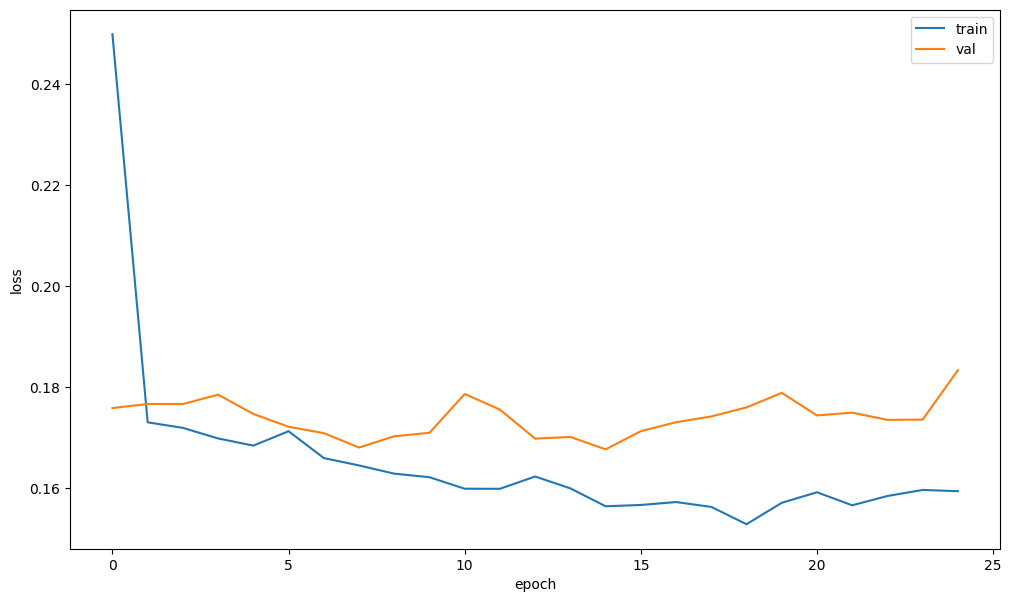

In [ ]:
# Построим график лосса при обучении и валидации
figure = plt.figure(figsize=(12, 7))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(losses['train'], label='train')
plt.plot(losses['val'], label='val')
plt.legend();

#### Сохраним веса модели -- в PyTorch это делается так:

In [ ]:
torch.save(model.state_dict(), 'AlexNet_fine_tune.pth')

#### Загрузим веса модели:

In [ ]:
model.load_state_dict(torch.load('AlexNet_fine_tune.pth'))

<All keys matched successfully>

#### Оценим модель на тесте (валидации):

In [ ]:
print("Accuracy: {0:.4f}".format(evaluate(model)))

Accuracy: 0.6078


Видим, что Fine Tuning AlexNet'а не дал хороших результатов, поскольку качество получается низким. Посмотрим, как будет с AlexNet в роли Feature Extractor'а.

* **Feature Extractor** способ:

In [ ]:
model_extractor = models.alexnet(pretrained=True)

Помним, что по-умолчанию все слои нейросети обучаются заново:

In [ ]:
for i, param in enumerate(model.parameters()):
    print(f'Parameter {i}: {param.requires_grad}')

Parameter 0: True
Parameter 1: True
Parameter 2: True
Parameter 3: True
Parameter 4: True
Parameter 5: True
Parameter 6: True
Parameter 7: True
Parameter 8: True
Parameter 9: True
Parameter 10: True
Parameter 11: True


Сделаем так, чтобы на них не распространялся backpropagation (то есть **заморозим их**), и подменим классификатор (ведь старый все еще с весами для ImageNet'а):

In [ ]:
# замораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.classifier = nn.Linear(num_features, 2)

# Использовать ли GPU
if use_gpu:
    model_extractor = model_extractor.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# Обучаем только классификатор
optimizer = optim.SGD(model_extractor.classifier.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
%%time
model_extractor,losses = train_model(model_extractor, loss_fn, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.9102 Acc: 0.7418
val Loss: 1.7056 Acc: 0.7320

Epoch 1/24
----------
train Loss: 0.8716 Acc: 0.8197
val Loss: 1.2338 Acc: 0.8431

Epoch 2/24
----------
train Loss: 1.0289 Acc: 0.8320
val Loss: 1.2029 Acc: 0.8039

Epoch 3/24
----------
train Loss: 0.5183 Acc: 0.9016
val Loss: 1.6965 Acc: 0.8431

Epoch 4/24
----------
train Loss: 0.7604 Acc: 0.8648
val Loss: 1.3722 Acc: 0.8497

Epoch 5/24
----------
train Loss: 0.8603 Acc: 0.8648
val Loss: 1.5031 Acc: 0.8693

Epoch 6/24
----------
train Loss: 0.6013 Acc: 0.9016
val Loss: 2.2093 Acc: 0.8562

Epoch 7/24
----------
train Loss: 0.5074 Acc: 0.9016
val Loss: 1.5081 Acc: 0.8693

Epoch 8/24
----------
train Loss: 0.3966 Acc: 0.9016
val Loss: 1.5108 Acc: 0.8627

Epoch 9/24
----------
train Loss: 0.4354 Acc: 0.9262
val Loss: 1.5635 Acc: 0.8562

Epoch 10/24
----------
train Loss: 0.3649 Acc: 0.9262
val Loss: 1.5228 Acc: 0.8627

Epoch 11/24
----------
train Loss: 0.2109 Acc: 0.9303
val Loss: 1.4597 Acc: 0.8758

Ep

In [ ]:
torch.save(model_extractor.state_dict(), 'AlexNet_extractor.pth')

In [ ]:
model_extractor.load_state_dict(torch.load('AlexNet_extractor.pth'))

<All keys matched successfully>

In [ ]:
print("Accuracy: {0:.4f}".format(evaluate(model_extractor)))

Accuracy: 0.8693


Видим, что качество намного лучше: ~90%.

* **Смешанный** способ:
Мы будем обучать не только последний **fully connected** слой, но и несколько предпоследних

In [ ]:
model_mixed = models.alexnet(pretrained=True)

In [ ]:
layers_to_unfreeze = 5

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_mixed.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False
    
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216
# Заменяем Fully-Connected слой на наш линейный классификатор
model_mixed.classifier = nn.Linear(num_features, 2)

# Использовать ли GPU
if use_gpu:
    model_mixed = model_mixed.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# Обучаем последние layers_to_unfreeze слоев из сверточной части и fully connected слой 
# parameters() возвращает просто список тензоров парамтеров, поэтому два таких списка можно сложить
optimizer = optim.SGD(list(model_mixed.features.parameters())[-layers_to_unfreeze:] + 
                      list(model_mixed.classifier.parameters()), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
%%time
_, losses = train_model(model_mixed, loss_fn, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.4954 Acc: 0.6475
val Loss: 0.1593 Acc: 0.7386

Epoch 1/24
----------
train Loss: 0.1512 Acc: 0.7254
val Loss: 0.1722 Acc: 0.7712

Epoch 2/24
----------
train Loss: 0.1242 Acc: 0.7787
val Loss: 0.1595 Acc: 0.7974

Epoch 3/24
----------
train Loss: 0.1150 Acc: 0.8402
val Loss: 0.1866 Acc: 0.7255

Epoch 4/24
----------
train Loss: 0.0973 Acc: 0.8156
val Loss: 0.0986 Acc: 0.8431

Epoch 5/24
----------
train Loss: 0.1198 Acc: 0.8074
val Loss: 0.1646 Acc: 0.6275

Epoch 6/24
----------
train Loss: 0.1350 Acc: 0.6803
val Loss: 0.1541 Acc: 0.6797

Epoch 7/24
----------
train Loss: 0.1268 Acc: 0.7295
val Loss: 0.1396 Acc: 0.7582

Epoch 8/24
----------
train Loss: 0.1172 Acc: 0.7541
val Loss: 0.1209 Acc: 0.7908

Epoch 9/24
----------
train Loss: 0.1039 Acc: 0.8197
val Loss: 0.1105 Acc: 0.8235

Epoch 10/24
----------
train Loss: 0.1067 Acc: 0.7869
val Loss: 0.1048 Acc: 0.8497

Epoch 11/24
----------
train Loss: 0.0877 Acc: 0.8361
val Loss: 0.1048 Acc: 0.8497

Ep

In [ ]:
torch.save(model_mixed.state_dict(), 'AlexNet_mixed.pth')

In [ ]:
model_mixed.load_state_dict(torch.load('AlexNet_mixed.pth'))

<All keys matched successfully>

In [ ]:
print("Accuracy: {0:.4f}".format(evaluate(model_mixed)))

Accuracy: 0.8758


Как видим, результат чуть-чуть ухудшился. Как Вы думаете, почему полный или частичный Fine Tuning в данном случае ухудшает качество работы нейросети?

---

### Более современные нейросети (10 баллов)

Теперь Вам предлагается **самостоятельно** сделать Fine Tuning и Transfer Learning для моделей VGG и Inception.

**Суммарно можно получить 10 баллов**.

### VGG16 (2 + 2 = 4 балла)

Здесь все будет аналогично AlexNet, только большее количество слоев:

In [ ]:
model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 251MB/s]


In [ ]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

* **Fine Tuning** способ (2 балла):

In [ ]:
for i, param in enumerate(model.parameters()):
    print(f'Parameter {i}: {param.requires_grad}')

Parameter 0: True
Parameter 1: True
Parameter 2: True
Parameter 3: True
Parameter 4: True
Parameter 5: True
Parameter 6: True
Parameter 7: True
Parameter 8: True
Parameter 9: True
Parameter 10: True
Parameter 11: True
Parameter 12: True
Parameter 13: True
Parameter 14: True
Parameter 15: True
Parameter 16: True
Parameter 17: True
Parameter 18: True
Parameter 19: True
Parameter 20: True
Parameter 21: True
Parameter 22: True
Parameter 23: True
Parameter 24: True
Parameter 25: True
Parameter 26: True
Parameter 27: True
Parameter 28: True
Parameter 29: True
Parameter 30: True
Parameter 31: True


In [ ]:
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = model.classifier[0].in_features
# Заменяем Fully-Connected слой на наш линейный классификатор
model.classifier = nn.Linear(num_features, 2)

# Использовать ли GPU
if use_gpu:
    model = model.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
# Запустим обучение
model, losses = train_model(model, loss_fn, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.1849 Acc: 0.5574
val Loss: 0.1868 Acc: 0.5425

Epoch 1/24
----------
train Loss: 0.1983 Acc: 0.5123
val Loss: 0.1874 Acc: 0.5425

Epoch 2/24
----------
train Loss: 0.2015 Acc: 0.4795
val Loss: 0.1864 Acc: 0.5425

Epoch 3/24
----------
train Loss: 0.1948 Acc: 0.5082
val Loss: 0.1891 Acc: 0.5425

Epoch 4/24
----------
train Loss: 0.1897 Acc: 0.4959
val Loss: 0.1870 Acc: 0.5425

Epoch 5/24
----------
train Loss: 0.1908 Acc: 0.5287
val Loss: 0.1902 Acc: 0.5425

Epoch 6/24
----------
train Loss: 0.1911 Acc: 0.5287
val Loss: 0.1905 Acc: 0.5425

Epoch 7/24
----------
train Loss: 0.2004 Acc: 0.4918
val Loss: 0.1926 Acc: 0.5425

Epoch 8/24
----------
train Loss: 0.2001 Acc: 0.4672
val Loss: 0.1890 Acc: 0.5425

Epoch 9/24
----------
train Loss: 0.2006 Acc: 0.5246
val Loss: 0.1906 Acc: 0.5425

Epoch 10/24
----------
train Loss: 0.1977 Acc: 0.4795
val Loss: 0.1863 Acc: 0.5425

Epoch 11/24
----------
train Loss: 0.1824 Acc: 0.5369
val Loss: 0.1891 Acc: 0.5425

Ep

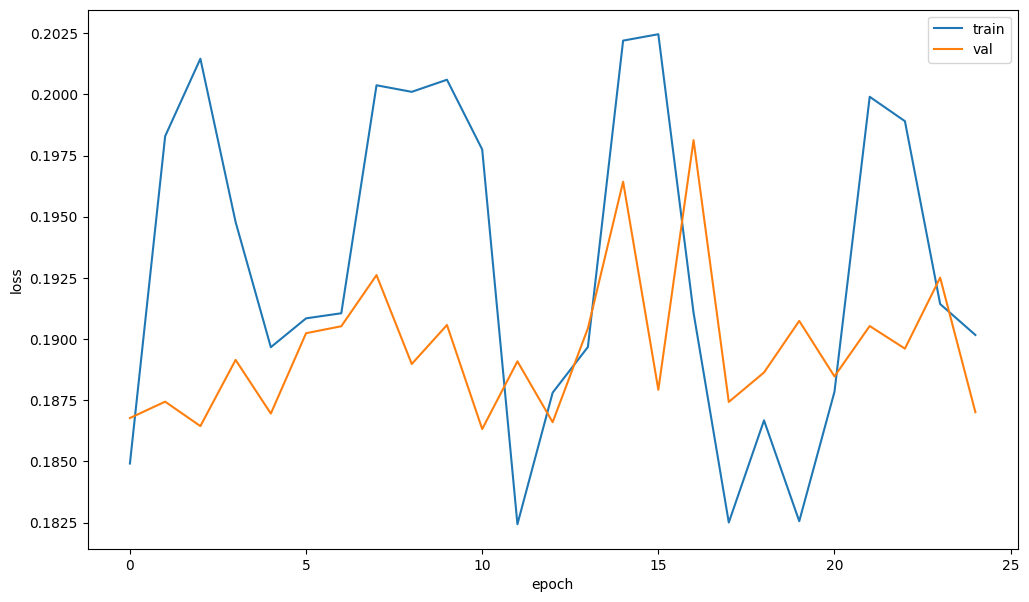

In [ ]:
figure = plt.figure(figsize=(12, 7))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(losses['train'], label='train')
plt.plot(losses['val'], label='val')
plt.legend();

In [ ]:
torch.save(model.state_dict(), 'VGG16_fine_tune.pth')

In [ ]:
model.load_state_dict(torch.load('VGG16_fine_tune.pth'))

<All keys matched successfully>

In [ ]:
print("Accuracy: {0:.4f}".format(evaluate(model)))

Accuracy: 0.5425


* **Feature Extractor** способ (2 балла):

In [ ]:
model_extractor = models.vgg16(pretrained=True)

In [ ]:
for i, param in enumerate(model_extractor.parameters()):
    print(f'Parameter {i}: {param.requires_grad}')

Parameter 0: True
Parameter 1: True
Parameter 2: True
Parameter 3: True
Parameter 4: True
Parameter 5: True
Parameter 6: True
Parameter 7: True
Parameter 8: True
Parameter 9: True
Parameter 10: True
Parameter 11: True
Parameter 12: True
Parameter 13: True
Parameter 14: True
Parameter 15: True
Parameter 16: True
Parameter 17: True
Parameter 18: True
Parameter 19: True
Parameter 20: True
Parameter 21: True
Parameter 22: True
Parameter 23: True
Parameter 24: True
Parameter 25: True
Parameter 26: True
Parameter 27: True
Parameter 28: True
Parameter 29: True
Parameter 30: True
Parameter 31: True


In [ ]:
# замораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = model_extractor.classifier[0].in_features
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.classifier = nn.Linear(num_features, 2)

# Использовать ли GPU
if use_gpu:
    model_extractor = model_extractor.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# Обучаем только классификатор
optimizer = optim.SGD(model_extractor.classifier.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
%%time
model_extractor,losses = train_model(model_extractor, loss_fn, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.3922 Acc: 0.7869
val Loss: 0.4419 Acc: 0.9150

Epoch 1/24
----------
train Loss: 0.3284 Acc: 0.8975
val Loss: 0.5721 Acc: 0.9150

Epoch 2/24
----------
train Loss: 0.2432 Acc: 0.9303
val Loss: 0.2632 Acc: 0.9216

Epoch 3/24
----------
train Loss: 0.3641 Acc: 0.8811
val Loss: 0.4591 Acc: 0.9150

Epoch 4/24
----------
train Loss: 0.2226 Acc: 0.9180
val Loss: 0.4677 Acc: 0.9216

Epoch 5/24
----------
train Loss: 0.3452 Acc: 0.9098
val Loss: 0.7718 Acc: 0.9150

Epoch 6/24
----------
train Loss: 0.2155 Acc: 0.9631
val Loss: 0.6766 Acc: 0.9150

Epoch 7/24
----------
train Loss: 0.1475 Acc: 0.9303
val Loss: 0.6059 Acc: 0.9150

Epoch 8/24
----------
train Loss: 0.0920 Acc: 0.9549
val Loss: 0.5987 Acc: 0.9085

Epoch 9/24
----------
train Loss: 0.0851 Acc: 0.9508
val Loss: 0.5945 Acc: 0.9150

Epoch 10/24
----------
train Loss: 0.1215 Acc: 0.9344
val Loss: 0.5955 Acc: 0.9085

Epoch 11/24
----------
train Loss: 0.0993 Acc: 0.9426
val Loss: 0.5972 Acc: 0.9150

Ep

In [ ]:
torch.save(model_extractor.state_dict(), 'VGG16_extractor.pth')

In [ ]:
model_extractor.load_state_dict(torch.load('VGG16_extractor.pth'))

<All keys matched successfully>

In [ ]:
print("Accuracy: {0:.4f}".format(evaluate(model_extractor)))

Accuracy: 0.9150


Какой подход оказался лучше с VGG? Сильная ли между ними разница в качестве? Как Вы думаете, почему?

### GoogleNet (Inception) (2 + 2 = 4 балла)

С этой нейросетью нужно сделать то же самое. Код снова можно переиспользовать от AlexNet/VGG, однако стоит учесть, что **слой классификации в Inception называется не `classificator`, а `fc`.**

In [ ]:
# Нужно поменять размер картинок на 299, иначе будет ошибка, так как размерность станет отрицательной.
# Это вызвано тем, что нейросеть изначально обучалась на картинках размера 299.

# Результирующий размер картинок определяется трансформациями
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(299),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Сам объект датасета
image_datasets = {
    x: datasets.ImageFolder(
        os.path.join(data_dir, x),
        data_transforms[x])
    for x in ['train', 'val']
}

# специальный класс для загрузки данных в виде батчей
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], 
        batch_size=4,
        shuffle=True, 
        num_workers=4
    )
    for x in ['train', 'val']
}

In [ ]:
model = models.googlenet(pretrained=True)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 84.3MB/s]


In [ ]:
model

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

* **Fine Tuning** способ (2 балла):

In [ ]:
for i, param in enumerate(model.parameters()):
    print(f'Parameter {i}: {param.requires_grad}')

Parameter 0: True
Parameter 1: True
Parameter 2: True
Parameter 3: True
Parameter 4: True
Parameter 5: True
Parameter 6: True
Parameter 7: True
Parameter 8: True
Parameter 9: True
Parameter 10: True
Parameter 11: True
Parameter 12: True
Parameter 13: True
Parameter 14: True
Parameter 15: True
Parameter 16: True
Parameter 17: True
Parameter 18: True
Parameter 19: True
Parameter 20: True
Parameter 21: True
Parameter 22: True
Parameter 23: True
Parameter 24: True
Parameter 25: True
Parameter 26: True
Parameter 27: True
Parameter 28: True
Parameter 29: True
Parameter 30: True
Parameter 31: True
Parameter 32: True
Parameter 33: True
Parameter 34: True
Parameter 35: True
Parameter 36: True
Parameter 37: True
Parameter 38: True
Parameter 39: True
Parameter 40: True
Parameter 41: True
Parameter 42: True
Parameter 43: True
Parameter 44: True
Parameter 45: True
Parameter 46: True
Parameter 47: True
Parameter 48: True
Parameter 49: True
Parameter 50: True
Parameter 51: True
Parameter 52: True
Par

In [ ]:
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = model.fc.in_features
# Заменяем Fully-Connected слой на наш линейный классификатор
model.fc = nn.Linear(num_features, 2)

# Использовать ли GPU
if use_gpu:
    model = model.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
%%time
model.aux_logits = False
model,losses = train_model(model, loss_fn, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.1788 Acc: 0.4836
val Loss: 0.1920 Acc: 0.4444

Epoch 1/24
----------
train Loss: 0.1780 Acc: 0.5246
val Loss: 0.1867 Acc: 0.4444

Epoch 2/24
----------
train Loss: 0.1787 Acc: 0.5246
val Loss: 0.1869 Acc: 0.4575

Epoch 3/24
----------
train Loss: 0.1783 Acc: 0.4631
val Loss: 0.1892 Acc: 0.4575

Epoch 4/24
----------
train Loss: 0.1791 Acc: 0.4836
val Loss: 0.1870 Acc: 0.4248

Epoch 5/24
----------
train Loss: 0.1842 Acc: 0.4426
val Loss: 0.1875 Acc: 0.4379

Epoch 6/24
----------
train Loss: 0.1806 Acc: 0.4467
val Loss: 0.1870 Acc: 0.4248

Epoch 7/24
----------
train Loss: 0.1805 Acc: 0.4918
val Loss: 0.1881 Acc: 0.4183

Epoch 8/24
----------
train Loss: 0.1791 Acc: 0.5123
val Loss: 0.1862 Acc: 0.4183

Epoch 9/24
----------
train Loss: 0.1778 Acc: 0.4918
val Loss: 0.1915 Acc: 0.4183

Epoch 10/24
----------
train Loss: 0.1780 Acc: 0.4795
val Loss: 0.1905 Acc: 0.4444

Epoch 11/24
----------
train Loss: 0.1780 Acc: 0.4672
val Loss: 0.1883 Acc: 0.4444

Ep

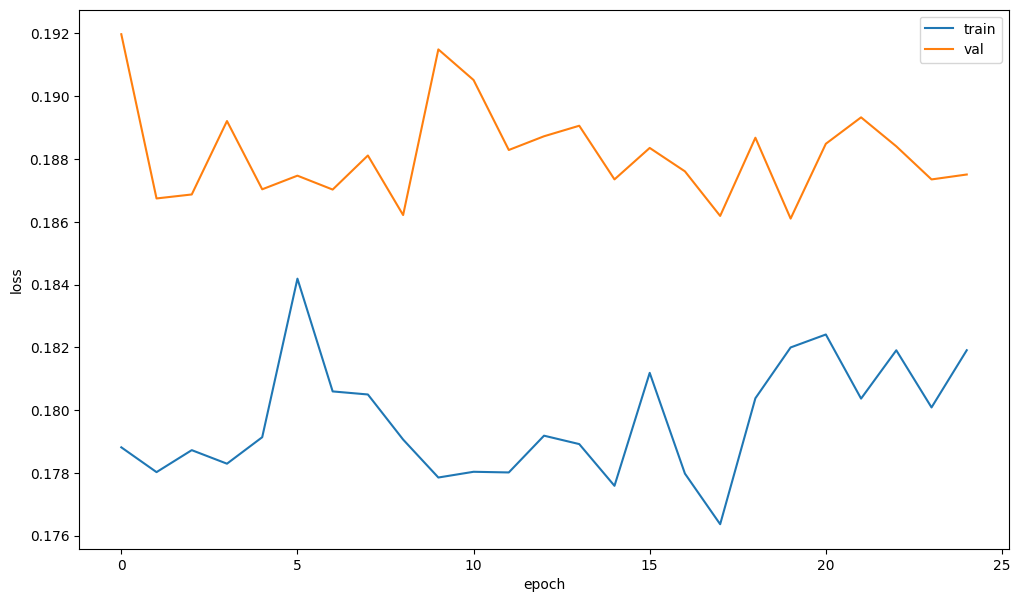

In [ ]:
figure = plt.figure(figsize=(12, 7))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(losses['train'], label='train')
plt.plot(losses['val'], label='val')
plt.legend();

In [ ]:
torch.save(model.state_dict(), 'GoogleNet_fine_tune.pth')

In [ ]:
model.load_state_dict(torch.load('GoogleNet_fine_tune.pth'))

<All keys matched successfully>

In [ ]:
print("Accuracy: {0:.4f}".format(evaluate(model)))

Accuracy: 0.4183


* **Feature Extractor** способ (2 балла):

In [ ]:
model_extractor = models.googlenet(pretrained=True)

In [ ]:
for i, param in enumerate(model_extractor.parameters()):
    print(f'Parameter {i}: {param.requires_grad}')

Parameter 0: True
Parameter 1: True
Parameter 2: True
Parameter 3: True
Parameter 4: True
Parameter 5: True
Parameter 6: True
Parameter 7: True
Parameter 8: True
Parameter 9: True
Parameter 10: True
Parameter 11: True
Parameter 12: True
Parameter 13: True
Parameter 14: True
Parameter 15: True
Parameter 16: True
Parameter 17: True
Parameter 18: True
Parameter 19: True
Parameter 20: True
Parameter 21: True
Parameter 22: True
Parameter 23: True
Parameter 24: True
Parameter 25: True
Parameter 26: True
Parameter 27: True
Parameter 28: True
Parameter 29: True
Parameter 30: True
Parameter 31: True
Parameter 32: True
Parameter 33: True
Parameter 34: True
Parameter 35: True
Parameter 36: True
Parameter 37: True
Parameter 38: True
Parameter 39: True
Parameter 40: True
Parameter 41: True
Parameter 42: True
Parameter 43: True
Parameter 44: True
Parameter 45: True
Parameter 46: True
Parameter 47: True
Parameter 48: True
Parameter 49: True
Parameter 50: True
Parameter 51: True
Parameter 52: True
Par

In [ ]:
# замораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = model_extractor.fc.in_features
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.fc = nn.Linear(num_features, 2)

# Использовать ли GPU
if use_gpu:
    model_extractor = model_extractor.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# Обучаем только классификатор
optimizer = optim.SGD(model_extractor.fc.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
%%time
model_extractor.aux_logits = False
model_extractor,losses = train_model(model_extractor, loss_fn, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.1682 Acc: 0.6352
val Loss: 0.1103 Acc: 0.8301

Epoch 1/24
----------
train Loss: 0.1438 Acc: 0.7254
val Loss: 0.0790 Acc: 0.9216

Epoch 2/24
----------
train Loss: 0.1217 Acc: 0.7500
val Loss: 0.0819 Acc: 0.8954

Epoch 3/24
----------
train Loss: 0.1047 Acc: 0.8033
val Loss: 0.0717 Acc: 0.9281

Epoch 4/24
----------
train Loss: 0.0945 Acc: 0.8484
val Loss: 0.0672 Acc: 0.9150

Epoch 5/24
----------
train Loss: 0.1170 Acc: 0.7582
val Loss: 0.0577 Acc: 0.9346

Epoch 6/24
----------
train Loss: 0.1065 Acc: 0.7910
val Loss: 0.0574 Acc: 0.9281

Epoch 7/24
----------
train Loss: 0.0895 Acc: 0.8402
val Loss: 0.0563 Acc: 0.9346

Epoch 8/24
----------
train Loss: 0.0925 Acc: 0.8197
val Loss: 0.0598 Acc: 0.9281

Epoch 9/24
----------
train Loss: 0.0865 Acc: 0.8279
val Loss: 0.0569 Acc: 0.9477

Epoch 10/24
----------
train Loss: 0.0969 Acc: 0.8402
val Loss: 0.0565 Acc: 0.9412

Epoch 11/24
----------
train Loss: 0.1016 Acc: 0.8320
val Loss: 0.0573 Acc: 0.9412

Ep

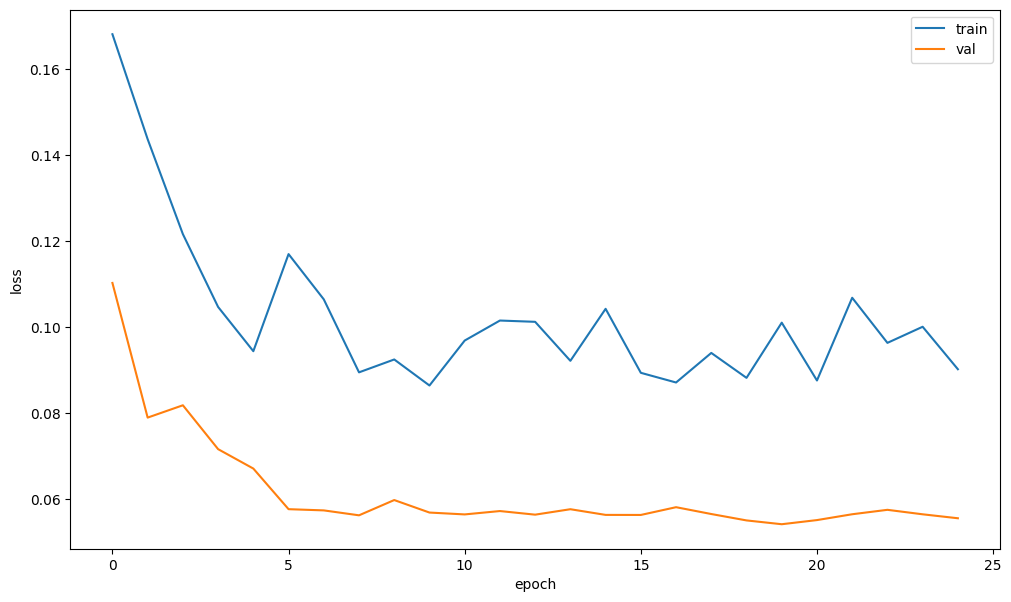

In [ ]:
figure = plt.figure(figsize=(12, 7))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(losses['train'], label='train')
plt.plot(losses['val'], label='val')
plt.legend();

In [ ]:
torch.save(model_extractor.state_dict(), 'GoogleNet_extractor.pth')

In [ ]:
model_extractor.load_state_dict(torch.load('GoogleNet_extractor.pth'))

<All keys matched successfully>

In [ ]:
print("Accuracy: {0:.4f}".format(evaluate(model_extractor)))

Accuracy: 0.9216


---

### Выводы (1 + 1 = 2 балла)

(1 балл) Какой подход оказался лучше с GoogleNet: Fine tuning или Feature Extractor? Сильная ли между этими подходами получилась разница в качестве? Как Вы думаете, почему?

**Ответ:** Feature Extractor показывает качество модели 92%, что намного лучше, чем Fine Tuning с точностью 41%. Разница велика. Обучение модели с fine-tuning подходом приводит к переобучению, что плохо сказывается на качество тестовой выборки.

(1 балла) Какая модель показала себя лучше всех по метрике качества? С чем это может быть связано?

**Ответ:** В данном случае, модель GoogleNet показала себя лучше по метрике качества, так как у нее больше слоев.

---

Можно убедиться, что все модели, которые мы использовали, успешно сохранены на диск и готовы к перемещению/переиспользованию:

In [ ]:
!ls

AlexNet_extractor.pth	 GoogleNet_fine_tune.pth  VGG16_extractor.pth
AlexNet_fine_tune.pth	 hymenoptera_data	  VGG16_fine_tune.pth
AlexNet_mixed.pth	 hymenoptera_data.zip
GoogleNet_extractor.pth  sample_data


Поздравляем!  
Теперь вы можете решать любые задачи классификации изображений самостоятельно с помощью техники Transfer Learning.


<h2 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Курс Стэнфордского университета по нейронным сетям: http://cs231n.github.io/transfer-learning/*

2). *Туториал на PyTorch Tutorials: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial*

3). *Статья на Medium про Transfer Learning в PyTorch: https://medium.com/@14prakash/almost-any-image-classification-problem-using-pytorch-i-am-in-love-with-pytorch-26c7aa979ec4*  